<a href="https://colab.research.google.com/github/firefox14-ops/-Gaussian-Processes-Model-/blob/main/Gaussian_Process_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated coefficients:
b_0 = 2.1216910312129595  \ 
b_1 = 0.9371789806400632


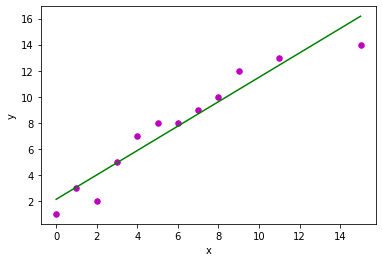

In [ ]:
#Linear Regression

import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx      #m 
    b_0 = m_y - b_1*m_x      #c
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x     #y=c+mx
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,11,15]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12,13,14]) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 

main() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


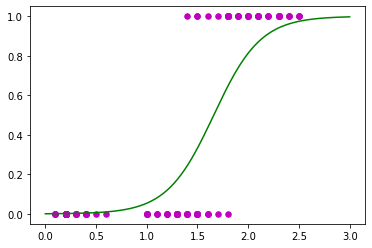

In [ ]:
# Train a logistic regression classifier to predict whether a flower is iris virginica or not
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X,y)

# Using matplotlib to plot the visualization
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = clf.predict_proba(X_new)
plt.scatter(X, y, color = "m", marker = "o", s = 30) 
plt.plot(X_new, y_prob[:,1], "g-", label="virginica")
plt.show()

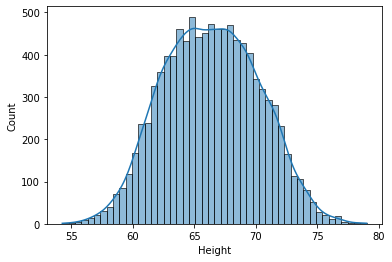

In [ ]:
#Bell Curve 

import pandas as pd
import seaborn as sn
df=pd.read_csv('/content/sample_data/weight-height.csv')
df.head()
sn.histplot(df.Height, kde=True)

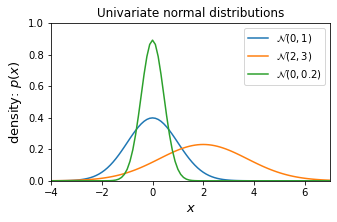

In [ ]:
#Univariate Distrubution 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

x = np.linspace(-4, 7, num=100)
fig = plt.figure(figsize=(5, 3))
plt.plot(x, univariate_normal(x, mean=0, variance=1), label="$\mathcal{N}(0, 1)$")
plt.plot(x, univariate_normal(x, mean=2, variance=3), label="$\mathcal{N}(2, 3)$")
plt.plot( x, univariate_normal(x, mean=0, variance=0.2), label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-4, 7])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()
#

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


root mean square error for (a) is :  291.0262076687311


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


root mean square error for (b) is :  294.59094791180087


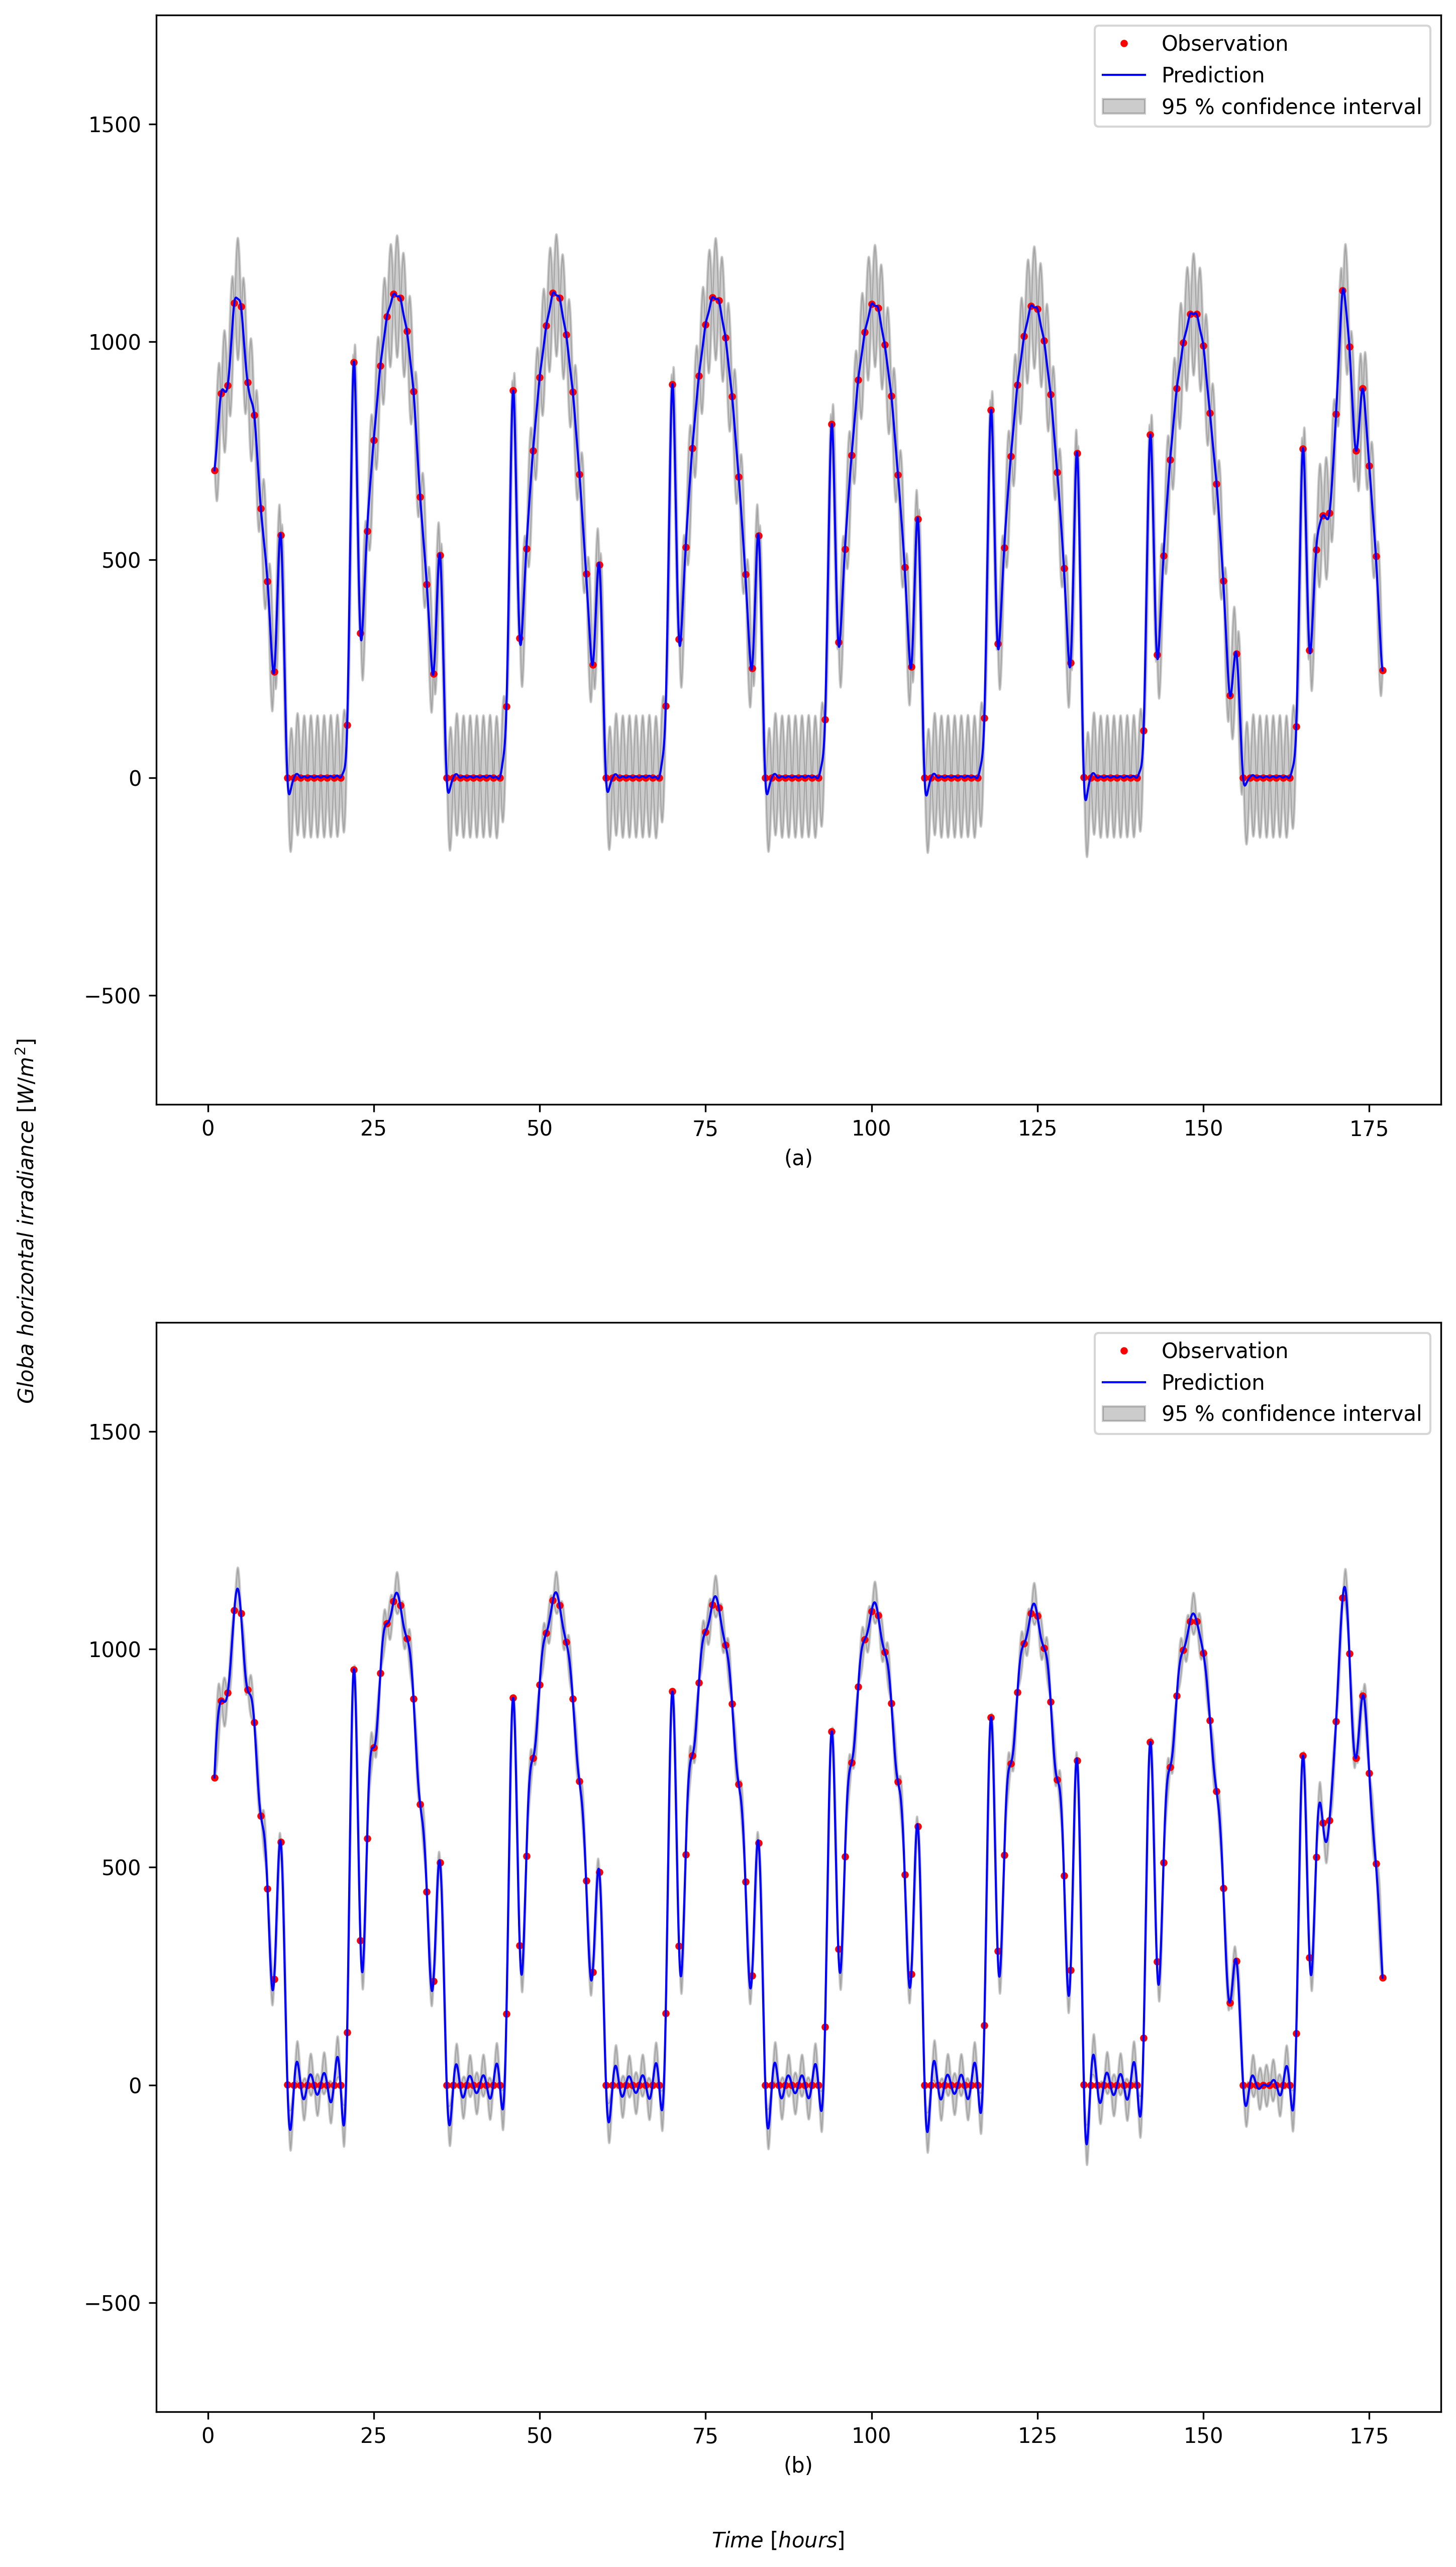

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp, DotProduct as Lin
 
np.random.seed(1)
 
df = pd.read_csv('/content/sample_data/weather_data.csv', sep=';')
 
df_array = np.asarray(df)
 
date = df_array[0:177, 0]
rec_num = df_array[0:177, 1]
ghi = df_array[0:177, 2]
DNI = df_array[0:177, 3]
DHI = df_array[0:177, 4]
DHI_shadowband = df_array[0:177, 5]
UVA = df_array[0:177, 6]
UVB = df_array[0:177, 7]
air_temp = df_array[0:177, 8]
BP = df_array[0:177, 9]
RH = df_array[0:177, 10]
WS = df_array[0:177, 11]
WD = df_array[0:177, 12]
WD_SD = df_array[0:177, 13]
 
y = np.asarray(
   [ghi, DNI, DHI, DHI_shadowband, UVA, UVB, air_temp, BP, RH, WS, WD,
    WD_SD]).T
 
X = np.atleast_2d([
   1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17.,
   18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
   33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
   48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.,
   63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
   78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
   93., 94., 95., 96., 97., 98., 99., 100., 101., 102., 103., 104., 105.,
   106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
   118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129.,
   130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
   142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
   154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
   166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177
]).T
 
#---------------------------------
 
x = np.atleast_2d(np.linspace(
   1, 177, 10739)).T 
 
#--
 
kernel=C()*RQ(length_scale=24,alpha=1)
 
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=4) 
 
gp.fit(X, y)
y_pred_1, sigma_1 = gp.predict(x, return_std=True)
 
rms1 = sqrt(mean_squared_error(y, y_pred_1[:177])) 
print("root mean square error for (a) is : ",rms1)
#---
 
kernel=C()*Exp(length_scale=24,periodicity=1)
 
gp=GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=100) 
 
gp.fit(X, y)
y_pred_2, sigma_2 = gp.predict(x, return_std=True)
 
rms2 = sqrt(mean_squared_error(y, y_pred_2[:177])) 
print("root mean square error for (b) is : ",rms2)
#---------------------------------
 
#Plot figure
fig = plt.figure(num=1, figsize=(11, 0.8), dpi=300, facecolor='w', edgecolor='k')
fig.text(0.5, -1, '$Time\ [hours]$', ha='center')
fig.text(0.04,10,'$Globa\ horizontal\ irradiance\ [W/m^2]$',va='center',rotation='vertical')
 
plt.subplot(2, 1, 1)
plt.plot(X, y[:, 0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_1[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between( x[:, 0],y_pred_1[:, 0] - 1.96 * sigma_1,y_pred_1[:, 0] + 1.96 * sigma_1,alpha=0.2,color='k',label=u'95 % confidence interval')
plt.xlabel('(a)')

plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)
 
plt.subplot(2, 1, 2)
plt.plot(X, y[:, 0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_2[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(x[:, 0],y_pred_2[:, 0] - 1.96 * sigma_2,y_pred_2[:, 0] + 1.96 * sigma_2,alpha=0.2,color='k',label=u'95 % confidence interval')
plt.xlabel('(b)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)
 
plt.subplots_adjust(top=20)
 
plt.savefig('all_in.png', bbox_inches='tight')
 
#--------------------
